<a href="https://colab.research.google.com/github/AgnesMachau/Moringa-Data-Science-Core-Independent-Project-Week-6/blob/main/Moringa_Data_Science_Core_Independent_Project_Week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Introduction**

As a football analyst in Mchezo Pesa Ltd, you are tasked to predict the results of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly. 

The datasets to be used are <a href="https://drive.google.com/open?id=1BYUqaEEnFtAe5lvzJh9lpVpR2MAvERUc">here</a>

##**Definition of the research question**
Predicting the results of a game between team 1 and team 2, based on who is home and who is away and whether or not the game is friendly.

##**The Metric for success**
For the models to be successful, they should have a high accuracy of 80% and above.

##**Context**
After a long period testing and analysing the best way to calculate the FIFA/Coca-Cola World Ranking, a new model took effect in August 2018 after approval by the FIFA Council.

This new version developed by FIFA was named "SUM" as it relies on adding/subtracting points won or lost for a game to/from the previous point totals rather than averaging game points over a given time period as in the previous version of the World Ranking.

The points which are added or subtracted are partially determined by the relative strength of the two opponents, including the logical expectation that teams higher in the ranking should fare better against teams lower in the ranking.


##**Experimental Design Taken**
My approach towards on this task is as follows;
* Downloading the datasets and uploading them to my jupiter notebook.
* Cleaning and tidying the datasets to make sure that i'll use data that is of high quality
* Merging the two datasets to come up with one dataset that contains all the important variables that will help in creating the models.
* Perform Exploratory Data Analysis to try and understand the data more and also to see the relationship between different variables.
* Check for Multicollinearity
* Feature Engineering where neccesary
* Create polynomial regression models based on home team rank and also based on away team rank.
* Create a logistic regression model.
* Cross-validate the model
* Compute RMSE
* Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test

##**Appropriateness of the data**
The data available is appropriate since it contains variables that are very useful in creating the models though there are a lot of columns lost after cleaning the dataset since the date and the rank date were not consistent.There are also some duplicates.

##**Importing Libraries**

In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import scipy as sp
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
import scipy.stats as stats

In [ ]:
#reading the fifa dataset
#previewing the fifa dataset
fifa_ranking = pd.read_csv('fifa_ranking.csv')
fifa_ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [ ]:
#reading the results dataset
#previewing the results dataset
results = pd.read_csv('results.csv')
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [ ]:
#checking the shape of the fifa dataset
fifa_ranking.shape

(57793, 16)

In [ ]:
#checking the shape of the results dataset
results.shape

(40839, 9)

In [ ]:
#checking the description of the fifa dataset
fifa_ranking.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [ ]:
#checking the description of the results dataset
results.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [ ]:
#checking the information of the fifa dataset
fifa_ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [ ]:
#checking the information of the results dataset
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [ ]:
# Description of the qualitative columns

fifa_ranking.describe(include = 'object')

,country_full,country_abrv,confederation,rank_date
count,57793,57793,57793,57793
unique,216,216,6,286
top,Sudan,SDN,UEFA,2018-04-12
freq,325,325,14933,211


In [ ]:
# Description of the qualitative columns

results.describe(include = 'object')

,date,home_team,away_team,tournament,city,country
count,40839,40839,40839,40839,40839,40839
unique,15115,309,306,109,1960,266
top,2012-02-29,Brazil,Uruguay,Friendly,Kuala Lumpur,United States
freq,66,563,536,16911,581,1144


In [ ]:
#checking the data types of fifa dataset
fifa_ranking.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

We can see that the column rank date has the wrong datatype 'object' instead of datetime.


In [ ]:
#importing the datetime library
#changing the data type of rank_date

import datetime
fifa_ranking["rank_date"] = fifa_ranking["rank_date"].apply(pd.to_datetime)
fifa_ranking.dtypes

rank                                int64
country_full                       object
country_abrv                       object
total_points                      float64
previous_points                     int64
rank_change                         int64
cur_year_avg                      float64
cur_year_avg_weighted             float64
last_year_avg                     float64
last_year_avg_weighted            float64
two_year_ago_avg                  float64
two_year_ago_weighted             float64
three_year_ago_avg                float64
three_year_ago_weighted           float64
confederation                      object
rank_date                  datetime64[ns]
dtype: object

In [ ]:
#checking the data type of results dataset
results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

We can see that the date column has the wrong data type 'object' instead of datetime.

In [ ]:
#changing the date data type to datetime
results["date"] = results["date"].apply(pd.to_datetime)
results.dtypes


date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

In [ ]:
#checking the fifa dataset columns
fifa_ranking.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

##**Data Cleaning**

###**Cleaning the fifa dataset**

Data Consistency

In [ ]:
#checking for any duplicates
#dropping duplicates
fifa_ranking.duplicated()
fifa_clean =fifa_ranking.drop_duplicates()
fifa_clean.shape

(57756, 16)

The dataset has 57756 rows and 16 columns.

Data Completeness

In [ ]:
# Determining the number of null values in each column

fifa_clean.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

There are no null values in the dataset

Data validity

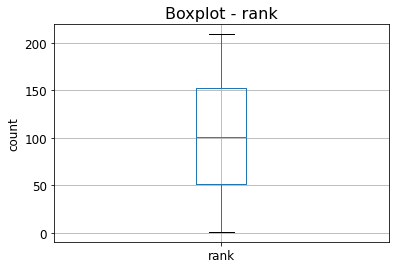

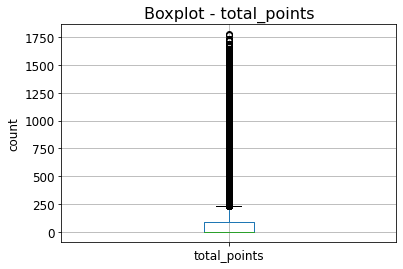

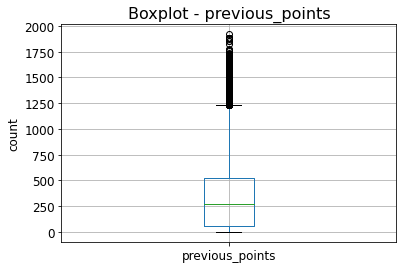

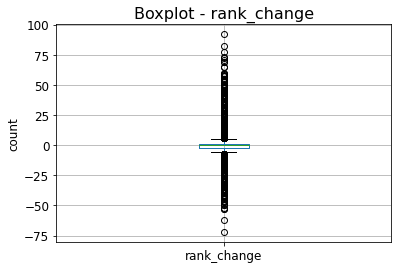

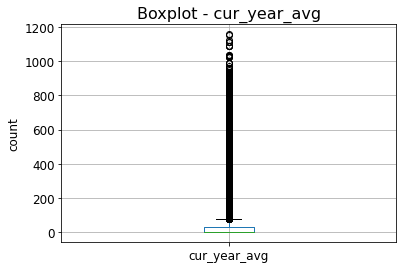

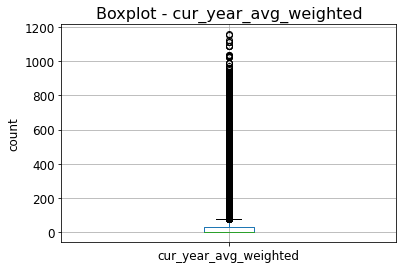

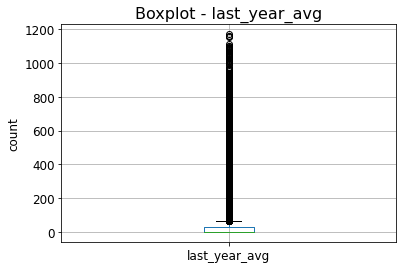

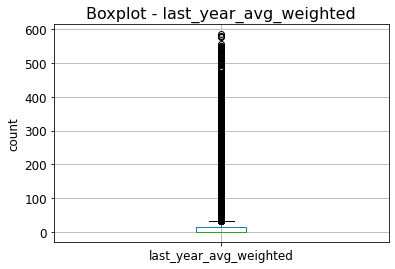

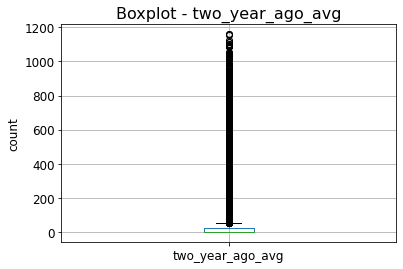

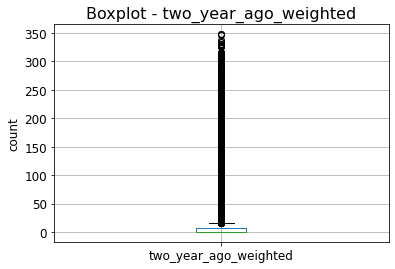

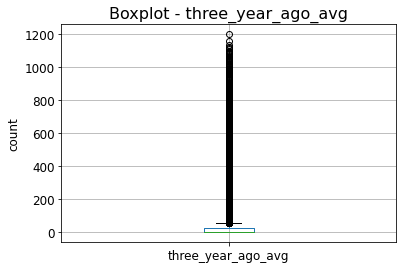

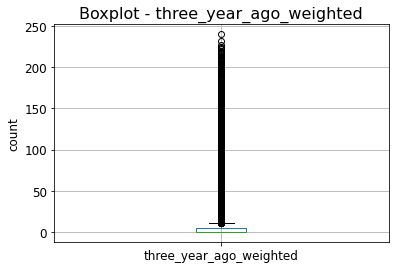

In [ ]:
#Checking for Outliers
cols = ['rank', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted']

for column in cols:
    plt.figure()
    fifa_clean.boxplot([column], fontsize= 12)
    plt.ylabel('count', fontsize = 12)
    plt.title('Boxplot - {}'.format(column), fontsize = 16)

We have a significant number of outliers but we chose not to drop the outliers to avoid losing so much data.

In [ ]:
#droping columns that are not useful
fifa_clean1 = fifa_clean.drop(columns = ['country_abrv', 'total_points', 'previous_points', 'rank_change',
       'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted'])
fifa_clean1

,rank,country_full,confederation,rank_date
0,1,Germany,UEFA,1993-08-08
1,2,Italy,UEFA,1993-08-08
2,3,Switzerland,UEFA,1993-08-08
3,4,Sweden,UEFA,1993-08-08
4,5,Argentina,CONMEBOL,1993-08-08
...,...,...,...,...
57788,206,Anguilla,CONCACAF,2018-06-07
57789,206,Bahamas,CONCACAF,2018-06-07
57790,206,Eritrea,CAF,2018-06-07
57791,206,Somalia,CAF,2018-06-07


###**Cleaning the results dataset**

Data Consistency

In [ ]:
#checking for any duplicates
#dropping duplicates
results.duplicated()
results_clean =results.drop_duplicates()
results_clean.shape



(40839, 9)

Data Completeness

In [ ]:
#checking for any null values
results_clean.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

Data Validity

In [ ]:
results_clean.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

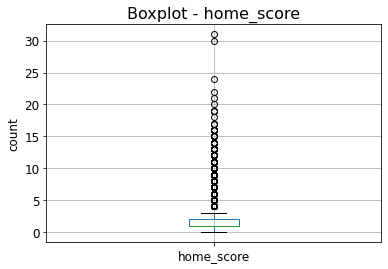

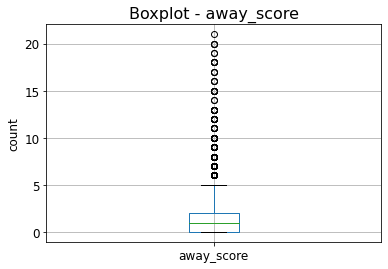

In [ ]:
#Checking for Outliers
cols = ['home_score', 'away_score']

for column in cols:
    plt.figure()
    results_clean.boxplot([column], fontsize= 12)
    plt.ylabel('count', fontsize = 12)
    plt.title('Boxplot - {}'.format(column), fontsize = 16)

In [ ]:
#droping columns that are not useful
results_clean1 = results_clean.drop(columns = ['city', 'neutral'])
results_clean1

,date,home_team,away_team,home_score,away_score,tournament,country
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland
1,1873-03-08,England,Scotland,4,2,Friendly,England
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,England
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland
...,...,...,...,...,...,...,...
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Samoa
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Samoa
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Egypt
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,India


We also didn't drop the outliers to avoid losing so much data

##**Merging the Datasets Based on Home Team**

In [ ]:
#combining the two datasets based on home team
home_team = pd.merge(results_clean1, fifa_clean1,left_on=['home_team'],right_on=['country_full'], how='left')
home_team.head()

,date,home_team,away_team,home_score,away_score,tournament,country,rank,country_full,confederation,rank_date
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,30.0,Scotland,UEFA,1993-08-08
1,1872-11-30,Scotland,England,0,0,Friendly,Scotland,28.0,Scotland,UEFA,1993-09-23
2,1872-11-30,Scotland,England,0,0,Friendly,Scotland,29.0,Scotland,UEFA,1993-10-22
3,1872-11-30,Scotland,England,0,0,Friendly,Scotland,25.0,Scotland,UEFA,1993-11-19
4,1872-11-30,Scotland,England,0,0,Friendly,Scotland,24.0,Scotland,UEFA,1993-12-23


In [ ]:
#checking the shape of the merged dataset
home_team.shape

(10273115, 11)

In [ ]:
#Dropping duplicate columns that have a date that is greater than the rank date
home_team = home_team[home_team.date == home_team.rank_date]
home_team.shape


(957, 11)

In [ ]:
#previewing the dataset
home_team.head()

,date,home_team,away_team,home_score,away_score,tournament,country,rank,country_full,confederation,rank_date
4559175,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,Bolivia,59.0,Bolivia,CONMEBOL,1993-08-08
4559461,1993-08-08,Brazil,Mexico,1,1,Friendly,Brazil,8.0,Brazil,CONMEBOL,1993-08-08
4559747,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Ecuador,35.0,Ecuador,CONMEBOL,1993-08-08
4560033,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Guinea,65.0,Guinea,CAF,1993-08-08
4560319,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Paraguay,67.0,Paraguay,CONMEBOL,1993-08-08


In [ ]:
#Dropping duplicates by specifying the subsets of columns to be used to identify the duplicates
home_team = home_team.drop_duplicates(subset=['date', 'home_team', 'away_team','home_score','away_score','tournament', 'confederation'], keep='first')

In [ ]:
#checkng the remaining columns
home_team.shape

(957, 11)

In [ ]:
#Previewing the dataset
home_team

,date,home_team,away_team,home_score,away_score,tournament,country,rank,country_full,confederation,rank_date
4559175,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,Bolivia,59.0,Bolivia,CONMEBOL,1993-08-08
4559461,1993-08-08,Brazil,Mexico,1,1,Friendly,Brazil,8.0,Brazil,CONMEBOL,1993-08-08
4559747,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Ecuador,35.0,Ecuador,CONMEBOL,1993-08-08
4560033,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Guinea,65.0,Guinea,CAF,1993-08-08
4560319,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Paraguay,67.0,Paraguay,CONMEBOL,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...
10030512,2018-06-07,England,Costa Rica,2,0,Friendly,England,12.0,England,UEFA,2018-06-07
10030798,2018-06-07,Uruguay,Uzbekistan,3,0,Friendly,Uruguay,14.0,Uruguay,CONMEBOL,2018-06-07
10031084,2018-06-07,Portugal,Algeria,3,0,Friendly,Portugal,4.0,Portugal,UEFA,2018-06-07
10031371,2018-06-07,Iceland,Ghana,2,2,Friendly,Iceland,22.0,Iceland,UEFA,2018-06-07


In [ ]:
# renaming the rank column

home_team.rename(columns={'rank':'home_team_rank'}, inplace=True)
home_team.head()

,date,home_team,away_team,home_score,away_score,tournament,country,home_team_rank,country_full,confederation,rank_date
4559175,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,Bolivia,59.0,Bolivia,CONMEBOL,1993-08-08
4559461,1993-08-08,Brazil,Mexico,1,1,Friendly,Brazil,8.0,Brazil,CONMEBOL,1993-08-08
4559747,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Ecuador,35.0,Ecuador,CONMEBOL,1993-08-08
4560033,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Guinea,65.0,Guinea,CAF,1993-08-08
4560319,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Paraguay,67.0,Paraguay,CONMEBOL,1993-08-08


##**Merging the Datasets Based on Away Team**

In [ ]:
#combining the two datasets based on away team
away_team = pd.merge(results_clean1, fifa_clean1,left_on=['away_team'],right_on=['country_full'], how='left')
away_team.head()

,date,home_team,away_team,home_score,away_score,tournament,country,rank,country_full,confederation,rank_date
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,11.0,England,UEFA,1993-08-08
1,1872-11-30,Scotland,England,0,0,Friendly,Scotland,5.0,England,UEFA,1993-09-23
2,1872-11-30,Scotland,England,0,0,Friendly,Scotland,10.0,England,UEFA,1993-10-22
3,1872-11-30,Scotland,England,0,0,Friendly,Scotland,8.0,England,UEFA,1993-11-19
4,1872-11-30,Scotland,England,0,0,Friendly,Scotland,11.0,England,UEFA,1993-12-23


In [ ]:
#checking the shape of the merged dataset
away_team.shape

(10195473, 11)

In [ ]:
#Dropping duplicate columns that have a date that is greater than the rank date
away_team = away_team[away_team.date <= away_team.rank_date]
away_team.shape

(7224733, 11)

In [ ]:
#previewing the dataset
away_team.head()

,date,home_team,away_team,home_score,away_score,tournament,country,rank,country_full,confederation,rank_date
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,11.0,England,UEFA,1993-08-08
1,1872-11-30,Scotland,England,0,0,Friendly,Scotland,5.0,England,UEFA,1993-09-23
2,1872-11-30,Scotland,England,0,0,Friendly,Scotland,10.0,England,UEFA,1993-10-22
3,1872-11-30,Scotland,England,0,0,Friendly,Scotland,8.0,England,UEFA,1993-11-19
4,1872-11-30,Scotland,England,0,0,Friendly,Scotland,11.0,England,UEFA,1993-12-23


In [ ]:
#Dropping duplicates by specifying the subsets of columns to be used to identify the duplicates
away_team = away_team.drop_duplicates(subset=['date', 'home_team', 'away_team','home_score','away_score','tournament', 'confederation'], keep='first')
away_team.shape

(35489, 11)

In [ ]:
# renaming the rank column

away_team.rename(columns={'rank':'away_team_rank'}, inplace=True)
away_team.head()

,date,home_team,away_team,home_score,away_score,tournament,country,away_team_rank,country_full,confederation,rank_date
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,11.0,England,UEFA,1993-08-08
286,1873-03-08,England,Scotland,4,2,Friendly,England,30.0,Scotland,UEFA,1993-08-08
572,1874-03-07,Scotland,England,2,1,Friendly,Scotland,11.0,England,UEFA,1993-08-08
858,1875-03-06,England,Scotland,2,2,Friendly,England,30.0,Scotland,UEFA,1993-08-08
1144,1876-03-04,Scotland,England,3,0,Friendly,Scotland,11.0,England,UEFA,1993-08-08


##**Merging the Home team and Away team datasets**

In [ ]:
#merging the home_team dataset and the away_team dataset
final_dataset = pd.merge(away_team, home_team,left_on=['date'],right_on=['date'], how='left')

final_dataset.head()

,date,home_team_x,away_team_x,home_score_x,away_score_x,tournament_x,country_x,away_team_rank,country_full_x,confederation_x,rank_date_x,home_team_y,away_team_y,home_score_y,away_score_y,tournament_y,country_y,home_team_rank,country_full_y,confederation_y,rank_date_y
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,11.0,England,UEFA,1993-08-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,1873-03-08,England,Scotland,4,2,Friendly,England,30.0,Scotland,UEFA,1993-08-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland,11.0,England,UEFA,1993-08-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,1875-03-06,England,Scotland,2,2,Friendly,England,30.0,Scotland,UEFA,1993-08-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland,11.0,England,UEFA,1993-08-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [ ]:

# dropping duplicates and unnecessary columns

final_dataset = final_dataset.drop(['home_team_y', 'away_team_y', 'home_score_y', 'away_score_y', 
                                          'tournament_y', 'country_full_y', 'confederation_y',
                                          'country_full_x', 'confederation_x', 'rank_date_y', 'rank_date_x'], 1)

final_dataset.head()

,date,home_team_x,away_team_x,home_score_x,away_score_x,tournament_x,country_x,away_team_rank,country_y,home_team_rank
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,11.0,NaN,NaN
1,1873-03-08,England,Scotland,4,2,Friendly,England,30.0,NaN,NaN
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland,11.0,NaN,NaN
3,1875-03-06,England,Scotland,2,2,Friendly,England,30.0,NaN,NaN
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland,11.0,NaN,NaN


In [ ]:

# dropping  duplicates
final_dataset = final_dataset.drop_duplicates(subset=['home_team_x', 'away_team_x', 'home_score_x', 'away_score_x', 'tournament_x'])

final_dataset.shape

(31642, 10)

In [ ]:
# renaming columns 

final_dataset.rename(columns={'home_score_x': 'home_score', 
                                 'away_score_x': 'away_score', 'tournament_x': 'tournament'}, inplace=True)
final_dataset.head()

,date,home_team_x,away_team_x,home_score,away_score,tournament,country_x,away_team_rank,country_y,home_team_rank
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,11.0,NaN,NaN
1,1873-03-08,England,Scotland,4,2,Friendly,England,30.0,NaN,NaN
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland,11.0,NaN,NaN
3,1875-03-06,England,Scotland,2,2,Friendly,England,30.0,NaN,NaN
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland,11.0,NaN,NaN


In [ ]:
#checking for null values
#dropping null values
final_dataset.isnull().sum()
final_dataset = final_dataset.dropna()

In [ ]:
#Checking if the null values have been dropped
final_dataset.isnull().sum()

date              0
home_team_x       0
away_team_x       0
home_score        0
away_score        0
tournament        0
country_x         0
away_team_rank    0
country_y         0
home_team_rank    0
dtype: int64

In [ ]:

# dropping the home_team, _away team columns, country_x and country_y columns.

final_dataset = final_dataset.drop(['home_team_x', 'away_team_x', 'country_x', 'country_y'], axis = 1)
final_dataset

,date,home_score,away_score,tournament,away_team_rank,home_team_rank
16047,1993-08-08,3,1,FIFA World Cup qualification,22.0,59.0
16061,1993-08-08,5,0,FIFA World Cup qualification,94.0,59.0
16075,1993-08-08,1,3,FIFA World Cup qualification,5.0,59.0
16082,1993-08-08,0,1,FIFA World Cup qualification,19.0,59.0
16142,1993-09-23,1,2,Friendly,38.0,44.0
...,...,...,...,...,...,...
56006,2018-06-07,3,0,Friendly,95.0,12.0
56011,2018-06-07,3,0,Friendly,66.0,12.0
56016,2018-06-07,0,0,Friendly,59.0,12.0
56021,2018-06-07,2,2,Friendly,47.0,12.0


In [ ]:
#checking the unique values of the tournament column
final_dataset['tournament'].nunique()
# Replace FIFA World Cup and FIFA World Cup qaulification
final_dataset["tournament"].replace({"FIFA World Cup": "World Cup", "FIFA World Cup qualification": "World Cup"}, inplace=True)

In [ ]:
# Replace values that are not World Cup or Friendly with Other

final_dataset.replace(['British Championship', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Copa Roca', 'Copa América', 'Copa Chevallier Boutell',
       'Nordic Championship', 'International Cup', 'Baltic Cup',
       'Balkan Cup', 'Copa Rio Branco', 'CCCF Championship',
       'NAFU Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'CONCACAF Championship',
       'Copa Juan Pinto Durán', 'UAFA Cup', 'South Pacific Games',
       'CONCACAF Championship qualification', 'Copa Artigas', 'GaNEFo',
       "King's Cup", 'Gulf Cup', 'Indonesia Tournament', 'Korea Cup',
       'Brazil Independence Cup', 'Copa Ramón Castilla',
       'Oceania Nations Cup', 'CECAFA Cup', 'Copa Félix Bogado',
       'Kirin Cup', 'CFU Caribbean Cup qualification',
       'CFU Caribbean Cup', 'Amílcar Cabral Cup', 'Mundialito',
       'West African Cup', 'Nehru Cup', 'Merlion Cup', 'UDEAC Cup',
       'Rous Cup', 'Tournoi de France', 'Malta International Tournament',
       'Lunar New Year Cup', 'Dynasty Cup', 'UNCAF Cup', 'Gold Cup',
       'USA Cup', 'Jordan International Tournament', 'Confederations Cup',
       'Island Games', 'United Arab Emirates Friendship Tournament',
       'Oceania Nations Cup qualification', 'Simba Tournament',
       'SAFF Cup', 'AFF Championship', 'King Hassan II Tournament',
       'Cyprus International Tournament', 'Dunhill Cup', 'COSAFA Cup',
       'Gold Cup qualification', 'SKN Football Festival', 'UNIFFAC Cup',
       'WAFF Championship', 'Millennium Cup', "Prime Minister's Cup",
       'EAFF Championship', 'AFC Challenge Cup', 'FIFI Wild Cup',
       'ELF Cup', 'UAFA Cup qualification',
       'AFC Challenge Cup qualification', 'African Nations Championship',
       'VFF Cup', 'Dragon Cup', 'ABCS Tournament',
       'Nile Basin Tournament', 'Nations Cup', 'Pacific Games', 'OSN Cup',
       'Copa América qualification', 'Intercontinental Cup'],'Other', inplace=True)
final_dataset['tournament'].unique()

array(['World Cup', 'Friendly', 'Other'], dtype=object)

In [ ]:
# Categorical boolean mask
categorical_feature_mask = final_dataset.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = final_dataset.columns[categorical_feature_mask].tolist()
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns
final_dataset[categorical_cols] = final_dataset[categorical_cols].apply(lambda col: le.fit_transform(col))
final_dataset[categorical_cols]

,tournament
16047,2
16061,2
16075,2
16082,2
16142,0
...,...
56006,0
56011,0
56016,0
56021,0


The tournament types are encoded as follows:
* Friendly is represented by 0
* If a match is of another tournament type except for friendly and worldcup it is represented by 1
* if the tournament type is worldcup, it is represented by 2




In [ ]:
#previewing the final dataset

final_dataset.head()

,date,home_score,away_score,tournament,away_team_rank,home_team_rank
16047,1993-08-08,3,1,2,22.0,59.0
16061,1993-08-08,5,0,2,94.0,59.0
16075,1993-08-08,1,3,2,5.0,59.0
16082,1993-08-08,0,1,2,19.0,59.0
16142,1993-09-23,1,2,0,38.0,44.0


##**Exploratory Data Analysis**

###**Univariate Analysis**

In [ ]:
#previewing the dataset
final_dataset.head()

,date,home_score,away_score,tournament,away_team_rank,home_team_rank
16047,1993-08-08,3,1,2,22.0,59.0
16061,1993-08-08,5,0,2,94.0,59.0
16075,1993-08-08,1,3,2,5.0,59.0
16082,1993-08-08,0,1,2,19.0,59.0
16142,1993-09-23,1,2,0,38.0,44.0


([<matplotlib.patches.Wedge at 0x7f2fc060b090>,
 [Text(-1.0158687296948539, -0.42191317119540617, 'Friendly'),
  Text(1.0886413832451198, -0.1576703481513015, 'Other'),
  Text(0.5631677847673024, 0.9449031940893677, 'World Cup')],
 [Text(-0.554110216197193, -0.23013445701567606, '62.530'),
  Text(0.5938043908609744, -0.08600200808252807, '20.361'),
  Text(0.3071824280548922, 0.5154017422305642, '17.108')])

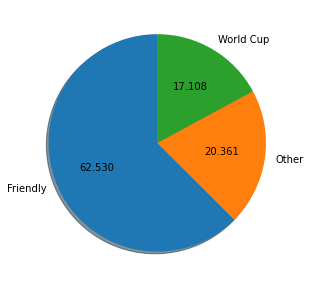

In [ ]:
#A pie chart thet represents the tournament column
plt.figure(figsize = (5,5))
plt.pie(final_dataset['tournament'].value_counts(),startangle = 90,autopct = '%.3f',
        labels=['Friendly', 'Other', 'World Cup'],shadow=True)


The pie chart shows that 62.530 percent of all tournaments are friendly follower by other tournament types and lastly worldcup.

In [ ]:
#A frequency table displaying the tournament types 
#friendly = 0
#other = 1
#world cup = 2
final_dataset.tournament.value_counts()

0    519
1    169
2    142
Name: tournament, dtype: int64

(array([742.,  70.,  12.,   3.,   1.,   1.,   0.,   0.,   0.,   1.]),
 array([ 0. ,  3.1,  6.2,  9.3, 12.4, 15.5, 18.6, 21.7, 24.8, 27.9, 31. ]),
 <a list of 10 Patch objects>)

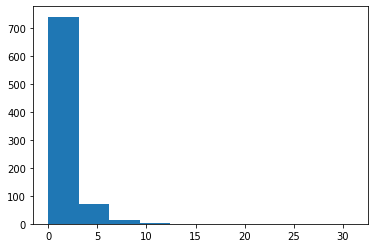

In [ ]:
#A histogram of the home score
plt.hist(final_dataset['home_score'])

The graph shows that most home scores are between 0 and 5

(array([343., 265., 138.,  51.,  20.,   5.,   3.,   2.,   1.,   2.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

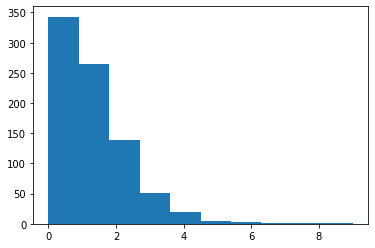

In [ ]:
#A histogram of the away score
plt.hist(final_dataset['away_score'])

Most away scores are between 0 and 2 as we can see in the graph above.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


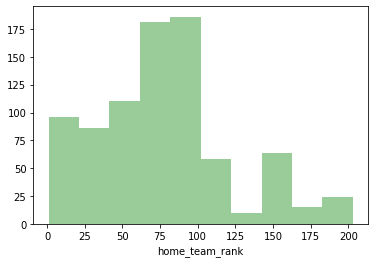

In [ ]:
#A distplot representing the home team rank
sns.distplot(final_dataset['home_team_rank'], kde=False, color = 'green',bins = 10)

The home team rank distplot looks more of normally distributed although it has some outliers on the right side.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


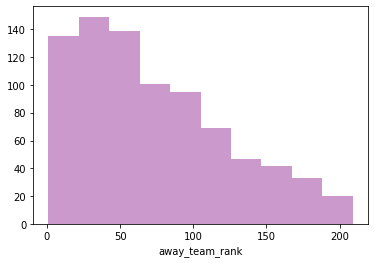

In [ ]:
#A distplot representing the away team rank
sns.distplot(final_dataset['away_team_rank'], kde=False, color = 'purple',bins = 10)

The away team rank distplot is skewed to the right.

####**Measures of Central Tendency**

In [ ]:
#The mean, median, and mode of the home score, away score, home team rank and away team rank
print('Home score Mean')
print(final_dataset['home_score'].mean())
print('Away score Mean')
print(final_dataset['away_score'].mean())
print('Home Team Rank Mean')
print(final_dataset['home_team_rank'].mean())
print('Away Team Rank Mean')
print(final_dataset['away_team_rank'].mean())
print('Home score Median')
print(final_dataset['home_score'].median())
print('Away score Median')
print(final_dataset['away_score'].median())
print('Home_team_rank median')
print(final_dataset['home_team_rank'].median())
print('Away_team_rank_median')
print(final_dataset['away_team_rank'].median())
print('Home score Mode')
print(final_dataset['home_score'].mode())
print('Away score Mode')
print(final_dataset['away_score'].mode())
print('Home_team_rank mode')
print(final_dataset['home_team_rank'].mode())
print('Away_team_rank_mode')
print(final_dataset['away_team_rank'].mode())


Home score Mean
1.7156626506024097
Away score Mean
1.0325301204819277
Home Team Rank Mean
76.88795180722892
Away Team Rank Mean
72.92409638554217
Home score Median
1.0
Away score Median
1.0
Home_team_rank median
70.0
Away_team_rank_median
62.0
Home score Mode
0    1
dtype: int64
Away score Mode
0    0
dtype: int64
Home_team_rank mode
0    66.0
dtype: float64
Away_team_rank_mode
0    47.0
dtype: float64


In [ ]:
#The mode of the tournament column
final_dataset['tournament'].mode()

0    0
dtype: int64

####**Measures of Dispersion**

In [ ]:
#The variance standard deviation and quatiles of home score and away score 
print('Home score Variance')
print(final_dataset['home_score'].var())
print('Away score variance')
print(final_dataset['away_score'].var())
print('Home score standard deviation')
print(final_dataset['home_score'].std())
print('Away score standard deviation')
print(final_dataset['away_score'].std())
print('Home score quatiles')
print(final_dataset['home_score'].quantile([0.25, 0.5, 0.75]))
print('Away score quatiles')
print(final_dataset['away_score'].quantile([0.25, 0.5, 0.75]))

Home score Variance
4.225447992210077
Away score variance
1.5297004665222973
Home score standard deviation
2.05558945127914
Away score standard deviation
1.2368106025266348
Home score quatiles
0.25    0.0
0.50    1.0
0.75    2.0
Name: home_score, dtype: float64
Away score quatiles
0.25    0.0
0.50    1.0
0.75    2.0
Name: away_score, dtype: float64


####**Skewness and Kurtosis**

In [ ]:
#The skewness and kurtosis of the home score and away score
print('Home score skewness')
print(final_dataset['home_score'].skew())
print('Away score skewness')
print(final_dataset['away_score'].skew())
print('Home score kurtosis')
print(final_dataset['home_score'].kurt())
print('Away score kurtosis')
print(final_dataset['away_score'].kurt())

Home score skewness
5.092614006727715
Away score skewness
1.9897235356825296
Home score kurtosis
55.26009658550061
Away score kurtosis
6.773771602633447


##**Bivariate Analysis**

In [ ]:
#Previewing the dataset
final_dataset.head()

,date,home_score,away_score,tournament,away_team_rank,home_team_rank
16047,1993-08-08,3,1,2,22.0,59.0
16061,1993-08-08,5,0,2,94.0,59.0
16075,1993-08-08,1,3,2,5.0,59.0
16082,1993-08-08,0,1,2,19.0,59.0
16142,1993-09-23,1,2,0,38.0,44.0


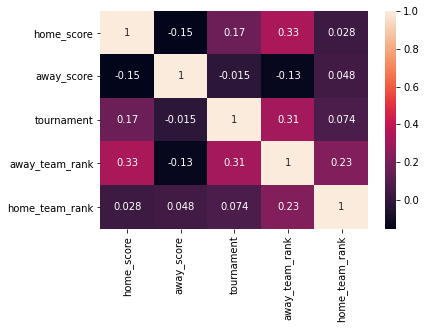

In [ ]:
#A heat map showing the correlation of the variables
sns.heatmap(final_dataset.corr(), annot=True)
plt.show()

The variables have a very low correlation between each other since the correlation of most variables is below 1.

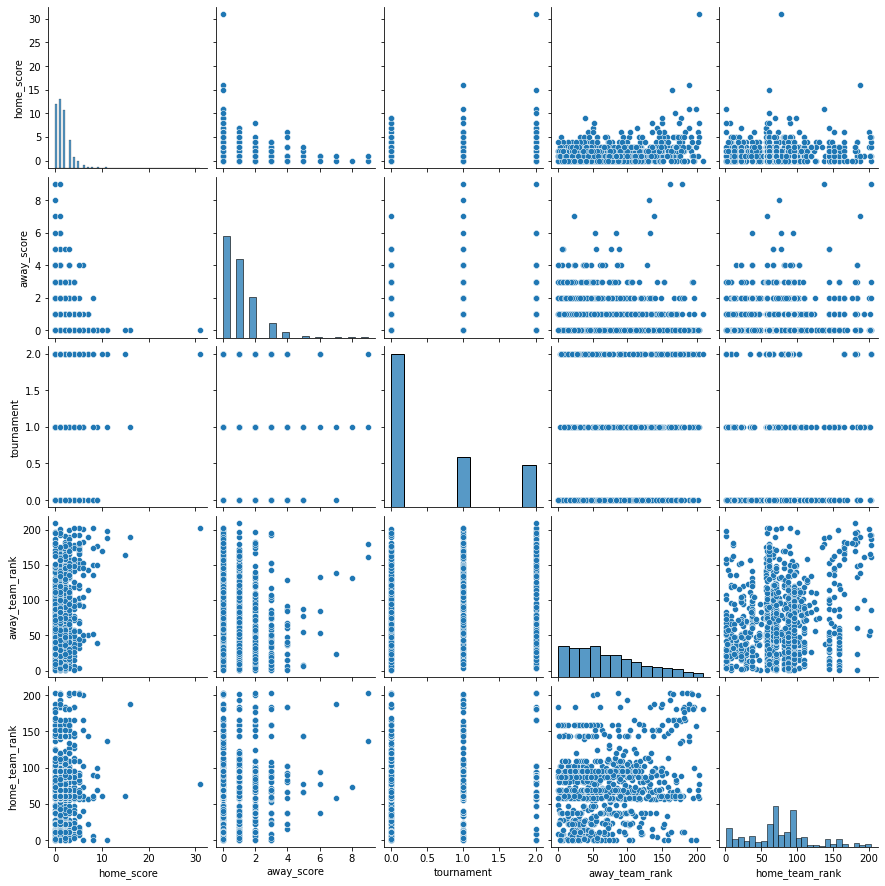

In [ ]:
#A pair plot showing correlation of different variables
sns.pairplot(final_dataset)

plt.show()

##**Checking for Multicollinearity**

In [ ]:
# Let's display the correlations between the variables
correlations = final_dataset.corr()

correlations

,home_score,away_score,tournament,away_team_rank,home_team_rank
home_score,1.000000,-0.152457,0.166288,0.330936,0.028180
away_score,-0.152457,1.000000,-0.014892,-0.130248,0.048260
tournament,0.166288,-0.014892,1.000000,0.311971,0.074076
away_team_rank,0.330936,-0.130248,0.311971,1.000000,0.230122
home_team_rank,0.028180,0.048260,0.074076,0.230122,1.000000


In [ ]:
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,home_score,away_score,tournament,away_team_rank,home_team_rank
home_score,1.146973,0.125973,-0.083822,-0.348040,0.047899
away_score,0.125973,1.038584,-0.038215,0.123760,-0.079321
tournament,-0.083822,-0.038215,1.114774,-0.324146,-0.003779
away_team_rank,-0.348040,0.123760,-0.324146,1.294570,-0.270062
home_team_rank,0.047899,-0.079321,-0.003779,-0.270062,1.064905


The VIF of most variables is below 5 and hence we can conclude that there is a low correlation between the variables.

##**Prediction using Polynomial Regression**

###**Predicting the Home Team Scores given the Home Team Rank**

In [ ]:
# getting our attributes and labels
X_home = np.array(final_dataset[['tournament', 'home_team_rank', 'away_team_rank']])
y_home = final_dataset['home_score']


print(X_home.shape)
print(y_home.shape)



(830, 3)
(830,)


In [ ]:
# fitting the Linear Regression model to our dataset
reg_line_home = LinearRegression()
reg_line_home.fit(X_home, y_home)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# getting our training and testing sets
X_home_train, X_home_test, y_home_train, y_home_test = train_test_split(X_home, y_home, 
                                                    test_size = 0.2, random_state = 0)

In [ ]:
#checking the size of y home train
y_home_train.shape

(664,)

In [ ]:
# fitting a polynomial regression to our data
poly_reg_home = PolynomialFeatures(degree = 5)
X_poly_home = poly_reg_home.fit_transform(X_home)

In [ ]:
# fitting a linear regression to our polynomial regression
lin_reg_home = LinearRegression()
lin_reg_home.fit(X_poly_home, y_home)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# using home rank 12, away rank 5, and tournament 0 (Friendly)

# predict using linear regression
lin_pred_home = reg_line_home.predict([[59, 22, 2]])
print("Linear Prediction: %d" %lin_pred_home)
print("Linear Prediction (accurate):", lin_pred_home)

# predict using polynomial regression
poly_pred_home = lin_reg_home.predict(poly_reg_home.fit_transform([[2, 22, 59]]))
print("Polynomial Prediction: %d" %poly_pred_home)
print("Polynomial Prediction (accurate):", poly_pred_home)

Linear Prediction: 11
Linear Prediction (accurate): [11.86958696]
Polynomial Prediction: 3
Polynomial Prediction (accurate): [3.08681411]


Our polynomial model is accurate since it predicts a value that is very close to the actual value.

In [ ]:
from sklearn.model_selection import KFold
# we will use k-fold cross validation with the standard 5 folds
folds = KFold(n_splits=5)

# first assess the accuracy of that model

regressor_home = LinearRegression()
regressor_home.fit(X_home_train, y_home_train)

y_predict_home = regressor_home.predict(X_home_test)

print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_home_test, y_predict_home)))



Root Mean Squared Error: 2.6160329898351273


In [ ]:
from sklearn.model_selection import KFold

# We will use the same 4 independent variables for this
X_home = np.array(final_dataset[['tournament', 'home_team_rank', 'away_team_rank']])
y_home = final_dataset['home_score']

folds = KFold(n_splits=5)
# create array to store the RMSE values of each fold

RMSES_home = []

# create a counter
count_home = 1

for train_index, test_index in folds.split(X_home):
    print("\nTraining model " + str(count_home))
    
    X_home_train, X_home_test = X_home[train_index], X_home[test_index]
    y_home_train, y_home_test = y_home.iloc[train_index], y_home.iloc[test_index]
    
    # fit a regression model accordingly
    reg_home = LinearRegression()
    reg_home.fit(X_home_train, y_home_train)
    
    # assess the accuracy of the model
    y_home_pred = reg_home.predict(X_home_test)
    
    rmse_value_home = np.sqrt(metrics.mean_squared_error(y_home_test, y_home_pred))
    RMSES_home.append(rmse_value_home)
    
    print('Model ' + str(count_home) + ' Root Mean Squared Error:',rmse_value_home)
    count_home += 1


Training model 1
Model 1 Root Mean Squared Error: 1.6979065445457313

Training model 2
Model 2 Root Mean Squared Error: 2.558495941410113

Training model 3
Model 3 Root Mean Squared Error: 1.6596455977188582

Training model 4
Model 4 Root Mean Squared Error: 1.4461819716969007

Training model 5
Model 5 Root Mean Squared Error: 2.1442425506827147


Since our RSME is 2.6160329898351273, we can prefer model two since its RSME is close to our model's RSME.
The rest of the models have a lower RSME compared to our model and model 4 has the lowest. We can make an assumption that the samples from which the models are made from have outliers with the data from which the forth model was made having the most outliers.

##**Residual plots and heteroskedasticity**

In [ ]:
# set prediction
home_reg = LinearRegression()
home_reg.fit(X_home_train, y_home_train)
home_predict = home_reg.predict(X_home_test)

In [ ]:

# creating residuals
residuals_home = np.subtract(home_predict, y_home_test)

# let's preview our residuals
residuals_home.head()

44366    0.844943
44373   -1.403868
44380    0.752938
44387   -0.832376
44401    1.015572
Name: home_score, dtype: float64

In [ ]:
# let's conduct a Bartlett's test for heteroscedasticity
test_result_home, p_value_home = sp.stats.bartlett(home_predict, residuals_home)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom_home = len(home_predict) - 1
probability_home = 1 - p_value_home

critical_value_home = sp.stats.chi2.ppf(probability_home, degree_of_freedom_home)
print(critical_value_home)

inf


In [ ]:

if (test_result_home > critical_value_home):
  print("The variances are heterogeneous, and the model needs to be reassessed.")
else:
  print("The variances are homogeneous. The model passes the test.")

The variances are homogeneous. The model passes the test.


Since the variances are homogeneous, we can conclude that our model has a high level of accuracy and hence we can trust it to make our predictions.

###**Predicting Away Scores using away team rank**

In [ ]:

# getting our attributes and labels
X_away = np.array(final_dataset[['home_team_rank', 'away_team_rank', 'tournament']])
y_away = final_dataset['away_score']
print(X_away.shape)
print(y_away.shape)

(830, 3)
(830,)


In [ ]:

# fitting the Linear Regression model to our dataset
reg_line_away = LinearRegression()
reg_line_away.fit(X_away, y_away)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# getting our training and testing sets
X_train_away,  X_test_away, y_train_away, y_test_away = train_test_split(X_away, y_away, 
                                                    test_size = 0.2, random_state = 0)

In [ ]:

# fitting a polynomial regression to our data
poly_reg_away = PolynomialFeatures(degree = 5)
X_poly_away = poly_reg_away.fit_transform(X_away)

In [ ]:
# fitting a linear regression to our polynomial regression
lin_reg_away = LinearRegression()
lin_reg_away.fit(X_poly_away, y_away)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# predict using linear regression
lin_pred_away = reg_line_away.predict([[59, 22, 2]])
print("Linear Prediction: %d" %lin_pred_away)
print("Linear Prediction (accurate):", lin_pred_away)

# predict using polynomial regression
poly_pred_away = lin_reg_away.predict(poly_reg_away.fit_transform([[5, 12, 0]]))
print("Polynomial Prediction: %d" %poly_pred_away)
print("Polynomial Prediction (accurate):", poly_pred_away)

Linear Prediction: 1
Linear Prediction (accurate): [1.25230301]
Polynomial Prediction: 1
Polynomial Prediction (accurate): [1.04566889]


We can observe that our model has a high level of accuracy since the value it has predicted is very close to the actual value.

###**Cross validation of the Model.**

In [ ]:

# first assess the accuracy of that model
regressor_away = LinearRegression()
regressor_away.fit(X_train_away, y_train_away)

y_predict_away = regressor_away.predict(X_test_away)

print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test_away, y_predict_away)))

Root Mean Squared Error: 1.207725742421003


Our model's RSME is 1.207725742421003

In [ ]:
# create array to store the RMSE values of each fold
RMSES_away = []

# create a counter
count_away = 1

for train_index, test_index in folds.split(X_away):
    print("\nTraining model " + str(count_away))
    
    X_away_train, X_away_test = X_away[train_index], X_away[test_index]
    y_away_train, y_away_test = y_away.iloc[train_index], y_away.iloc[test_index]
    
    # fit a regression model accordingly
    reg_away = LinearRegression()
    reg_away.fit(X_away_train, y_away_train)
    
    # assess the accuracy of the model
    y_away_pred = reg_away.predict(X_away_test)

    rmse_value_away = np.sqrt(metrics.mean_squared_error(y_away_test, y_away_pred))
    RMSES_away.append(rmse_value_away)
    
    print('Model ' + str(count_away) + ' Root Mean Squared Error:',rmse_value_away)
    count_away += 1


Training model 1
Model 1 Root Mean Squared Error: 1.2783362004722858

Training model 2
Model 2 Root Mean Squared Error: 1.4231731712605769

Training model 3
Model 3 Root Mean Squared Error: 1.2437182452039646

Training model 4
Model 4 Root Mean Squared Error: 1.0617048167127203

Training model 5
Model 5 Root Mean Squared Error: 1.0933880896240558


Model 3's RSME seems to be the closest to our model's RSME and hence we can prefer it when making predictions. The remaining RSMEs seem to be around the model's RSME and hence we can make an assumption that the samples from which the models were made could contain some outliers.

##**Residual plots and Heteroskedasticity**

In [ ]:
# set prediction
away_reg = LinearRegression()
away_reg.fit(X_train_away, y_train_away)
away_predict = away_reg.predict(X_test_away)

In [ ]:
# creating residuals
residuals_away = np.subtract(away_predict, y_test_away)

# let's preview our residuals
residuals_away.head()

43662    1.221873
17734   -1.125672
34529    1.013493
16424    0.938528
29872   -2.831583
Name: away_score, dtype: float64

In [ ]:
# let's conduct a Bartlett's test for heteroscedasticity
test_result_away, p_value_away = sp.stats.bartlett(away_predict, residuals_away)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom_away = len(away_predict) - 1
probability_away = 1 - p_value_away

critical_value_away = sp.stats.chi2.ppf(probability_away, degree_of_freedom_away)
print(critical_value_away)

inf


In [ ]:
if (test_result_away > critical_value_away):
  print("The variances are heterogeneous, and the model needs to be reassessed.")
else:
  print("The variances are homogeneous. The model passes the test.")

The variances are homogeneous. The model passes the test.


The model has a high level of accuracy since the variances are homogeneous.


##**Logistic Regression**

In [ ]:

#Creating a new column 'Status' 
def f(row):
    if row['home_score'] == row['away_score']:
        val = 'Draw'
    elif row['home_score'] > row['away_score']:
        val = 'Win'
    else:
        val = 'Lose'
    return val

final_dataset['Status'] = final_dataset.apply(f, axis=1)

final_dataset.head()

,date,home_score,away_score,tournament,away_team_rank,home_team_rank,Status
16047,1993-08-08,3,1,2,22.0,59.0,Win
16061,1993-08-08,5,0,2,94.0,59.0,Win
16075,1993-08-08,1,3,2,5.0,59.0,Lose
16082,1993-08-08,0,1,2,19.0,59.0,Lose
16142,1993-09-23,1,2,0,38.0,44.0,Lose


**Encoding the status column**

In [ ]:
# Categorical boolean mask
categorical_feature_mask = final_dataset.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = final_dataset.columns[categorical_feature_mask].tolist()
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns
final_dataset[categorical_cols] = final_dataset[categorical_cols].apply(lambda col: le.fit_transform(col))
final_dataset[categorical_cols]

,Status
16047,2
16061,2
16075,1
16082,1
16142,1
...,...
56006,2
56011,2
56016,0
56021,0


0 = draw

1 = lose

2 = win

In [ ]:
#previewing the dataset
final_dataset.head()

,date,home_score,away_score,tournament,away_team_rank,home_team_rank,Status
16047,1993-08-08,3,1,2,22.0,59.0,2
16061,1993-08-08,5,0,2,94.0,59.0,2
16075,1993-08-08,1,3,2,5.0,59.0,1
16082,1993-08-08,0,1,2,19.0,59.0,1
16142,1993-09-23,1,2,0,38.0,44.0,1


In [ ]:
#Dropping the date column since it will not be useful while creating our ligistic model
final_dataset = final_dataset.drop(['date'], 1)
final_dataset

,home_score,away_score,tournament,away_team_rank,home_team_rank,Status
16047,3,1,2,22.0,59.0,2
16061,5,0,2,94.0,59.0,2
16075,1,3,2,5.0,59.0,1
16082,0,1,2,19.0,59.0,1
16142,1,2,0,38.0,44.0,1
...,...,...,...,...,...,...
56006,3,0,0,95.0,12.0,2
56011,3,0,0,66.0,12.0,2
56016,0,0,0,59.0,12.0,0
56021,2,2,0,47.0,12.0,0


In [ ]:
#viewing the columns of the final dataset
final_dataset.columns

Index(['home_score', 'away_score', 'tournament', 'away_team_rank',
       'home_team_rank', 'Status'],
      dtype='object')

In [ ]:
#checking the shape of the status column
final_dataset['Status'].shape

(830,)

In [ ]:
#Splitting the data
X=final_dataset.drop('Status', axis=1)

y=final_dataset['Status']
print(X.shape)
print(y.shape)
X


(830, 5)
(830,)


,home_score,away_score,tournament,away_team_rank,home_team_rank
16047,3,1,2,22.0,59.0
16061,5,0,2,94.0,59.0
16075,1,3,2,5.0,59.0
16082,0,1,2,19.0,59.0
16142,1,2,0,38.0,44.0
...,...,...,...,...,...
56006,3,0,0,95.0,12.0
56011,3,0,0,66.0,12.0
56016,0,0,0,59.0,12.0
56021,2,2,0,47.0,12.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=25)

In [ ]:
# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:

# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

In [ ]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[43,  0,  0],
       [ 0, 46,  0],
       [ 0,  0, 77]])

The array above shows that the number of correct predictions is 43, 46 and 77 and there are no wrong predictions. This makes our model perfect and it could be as a result of overfitting.

In [ ]:
#accuracy score
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(LogReg.score(X_test,y_test)))

Accuracy of logistic regression classifier on test set: 1.00


Our model is 100% accurate. This shows that we may have an issue of overfitting even though the accuracy is within the range where we consider our model to be successful.

In [ ]:
#viewing our predicted values and our actual values
final_dataset = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
final_dataset

,Actual,Predicted
54970,1,1
39822,2,2
25724,2,2
46035,2,2
19205,2,2
...,...,...
50431,0,0
50147,1,1
24680,2,2
24610,2,2


In [ ]:
#computing the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


Our model has a Rsme of 0 which also shows that there could be a chance that there was overfitting.

##**Challenging the solution**
I feel like there could be an issue of overfitting in the logical model since the model is 100% accurate which is not realistic.

More data would also have made the models better and especially if some matches
 didn't miss the rank dates.

##**Follow up questions**
* **Did we have the right question?**
Yes we had the right question which enabled us to predict our scores based on very key variables such as, ranks of both home teams and away teams and also based on the tournament type.

* **Did we have the right data?**
I feel like the data was not enough since there were so many columns that needed to be dropped due to inconsistencies. Also the data collection methods used to collect the data are not that good since some columns missed important information (some matches didn't have the rank date)

* **Did we have the right question?**
Yes we did, the question made a lot of sense and it enabled us to come up with pretty acurate models

##**Conclusion**
The datasets provided were sufficient enough to help us buid models that meet our minimum level of accuracy which is 80% and hence the project is a success and we can trust our models to make predictions despite making some assumptions and having so many outliers that were not dropped. However, the model can be improved if more quality data is availed.